# Python Project  01 from KSI

# Farhana Hoque

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv("C:\Python Projects Dataset\Churn (3).csv.csv")

In [4]:
# Step 1: Summary of the Dataset
print("Dataset Summary:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())
print("\nClass Distribution:")
print(df['Churn'].value_counts())

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          667 non-null    int64  
 1   Area code               667 non-null    int64  
 2   Total day minutes       667 non-null    float64
 3   Total day calls         667 non-null    int64  
 4   Total day charge        667 non-null    float64
 5   Total eve minutes       667 non-null    float64
 6   Total eve calls         667 non-null    int64  
 7   Total eve charge        667 non-null    float64
 8   Total night minutes     667 non-null    float64
 9   Total night calls       667 non-null    int64  
 10  Total night charge      667 non-null    float64
 11  Total intl minutes      667 non-null    float64
 12  Total intl calls        667 non-null    int64  
 13  Total intl charge       667 non-null    float64
 14  Customer service calls  6

In [6]:
# Step 2: Data Preparation
# Label Encoding
label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])
df

Account length  Area code  Total day minutes  Total day calls  \
0               117        408              184.5               97   
1                65        415              129.1              137   
2               161        415              332.9               67   
3               111        415              110.4              103   
4                49        510              119.3              117   
..              ...        ...                ...              ...   
662             114        415              137.1               88   
663             106        408               83.6              131   
664              60        415              193.9              118   
665             159        415              169.8              114   
666             184        510              213.8              105   

     Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0               31.37              351.6               80             29.89   
1               21.95              228.5               83             19.42   
2               56.59              317.8               97             27.01   
3               18.77              137.3              102             11.67   
4               20.28              215.1              109             18.28   
..                ...                ...              ...               ...   
662             23.31              155.7              125             13.23   
663             14.21              203.9              131             17.33   
664             32.96               85.0              110              7.23   
665             28.87              197.7              105             16.80   
666             36.35              159.6               84             13.57   

     Total night minutes  Total night calls  Total night charge  \
0                  215.8                 90                9.71   
1                  208.8                111                9.40   
2                  160.6                128                7.23   
3                  189.6                105                8.53   
4                  178.7                 90                8.04   
..                   ...                ...                 ...   
662                247.6                 94               11.14   
663                229.5                 73               10.33   
664                210.1                134                9.45   
665                193.7                 82                8.72   
666                139.2                137                6.26   

     Total intl minutes  Total intl calls  Total intl charge  \
0                   8.7                 4               2.35   
1                  12.7                 6               3.43   
2                   5.4                 9               1.46   
3                   7.7                 6               2.08   
4                  11.1                 1               3.00   
..                  ...               ...                ...   
662                11.5                 7               3.11   
663                 8.1                 3               2.19   
664                13.2                 8               3.56   
665                11.6                 4               3.13   
666                 5.0                10               1.35   

     Customer service calls  Churn  
0                         1      0  
1                         4      1  
2                         4      1  
3                         2      0  
4                         1      0  
..                      ...    ...  
662                       2      0  
663                       1      0  
664                       3      0  
665                       1      0  
666                       2      0  

[667 rows x 16 columns]

In [8]:
# Feature Scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('Churn', axis=1)), columns=df.columns[:-1])
df_scaled['Churn'] = df['Churn']
df_scaled

Account length  Area code  Total day minutes  Total day calls  \
0          0.347127  -0.674397           0.064036        -0.193167   
1         -0.927731  -0.506741          -0.934756         1.769398   
2          1.425853  -0.506741           2.739500        -1.665090   
3          0.200028  -0.506741          -1.271894         0.101218   
4         -1.319994   1.768601          -1.111438         0.788115   
..              ...        ...                ...              ...   
662        0.273578  -0.506741          -0.790526        -0.634744   
663        0.077446  -0.674397          -1.755064         1.475013   
664       -1.050313  -0.506741           0.233506         0.837179   
665        1.376820  -0.506741          -0.200987         0.640923   
666        1.989732   1.768601           0.592278         0.199346   

     Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0            0.064504           2.983872        -1.081478          2.984789   
1           -0.934501           0.506113        -0.923033          0.505504   
2            2.739121           2.303545        -0.183625          2.302808   
3           -1.271744          -1.329563         0.080450         -1.329688   
4           -1.111607           0.236397         0.450154          0.235553   
..                ...                ...              ...               ...   
662         -0.790271          -0.959207         1.295192         -0.960282   
663         -1.755339           0.010963         1.612082          0.010594   
664          0.233126          -2.382258         0.502969         -2.381076   
665         -0.200625          -0.113830         0.238894         -0.114910   
666          0.592640          -0.880708        -0.870218         -0.879770   

     Total night minutes  Total night calls  Total night charge  \
0               0.324092          -0.501749            0.323581   
1               0.183311           0.540053            0.185049   
2              -0.786067           1.383417           -0.784675   
3              -0.202831           0.242395           -0.203735   
4              -0.422048          -0.501749           -0.422705   
..                   ...                ...                 ...   
662             0.963640          -0.303310            0.962616   
663             0.599620          -1.345113            0.600645   
664             0.209456           1.681075            0.207393   
665            -0.120374          -0.898626           -0.118828   
666            -1.216455           1.829904           -1.218147   

     Total intl minutes  Total intl calls  Total intl charge  \
0             -0.548297         -0.212747          -0.547714   
1              0.877350          0.593516           0.877843   
2             -1.724455          1.802910          -1.722480   
3             -0.904709          0.593516          -0.904104   
4              0.307091         -1.422141           0.310260   
..                  ...               ...                ...   
662            0.449656          0.996647           0.455456   
663           -0.762144         -0.615879          -0.758908   
664            1.055556          1.399779           1.049438   
665            0.485297         -0.212747           0.481855   
666           -1.867020          2.206042          -1.867675   

     Customer service calls  Churn  
0                 -0.423098      0  
1                  1.828550      1  
2                  1.828550      1  
3                  0.327451      0  
4                 -0.423098      0  
..                      ...    ...  
662                0.327451      0  
663               -0.423098      0  
664                1.078001      0  
665               -0.423098      0  
666                0.327451      0  

[667 rows x 16 columns]

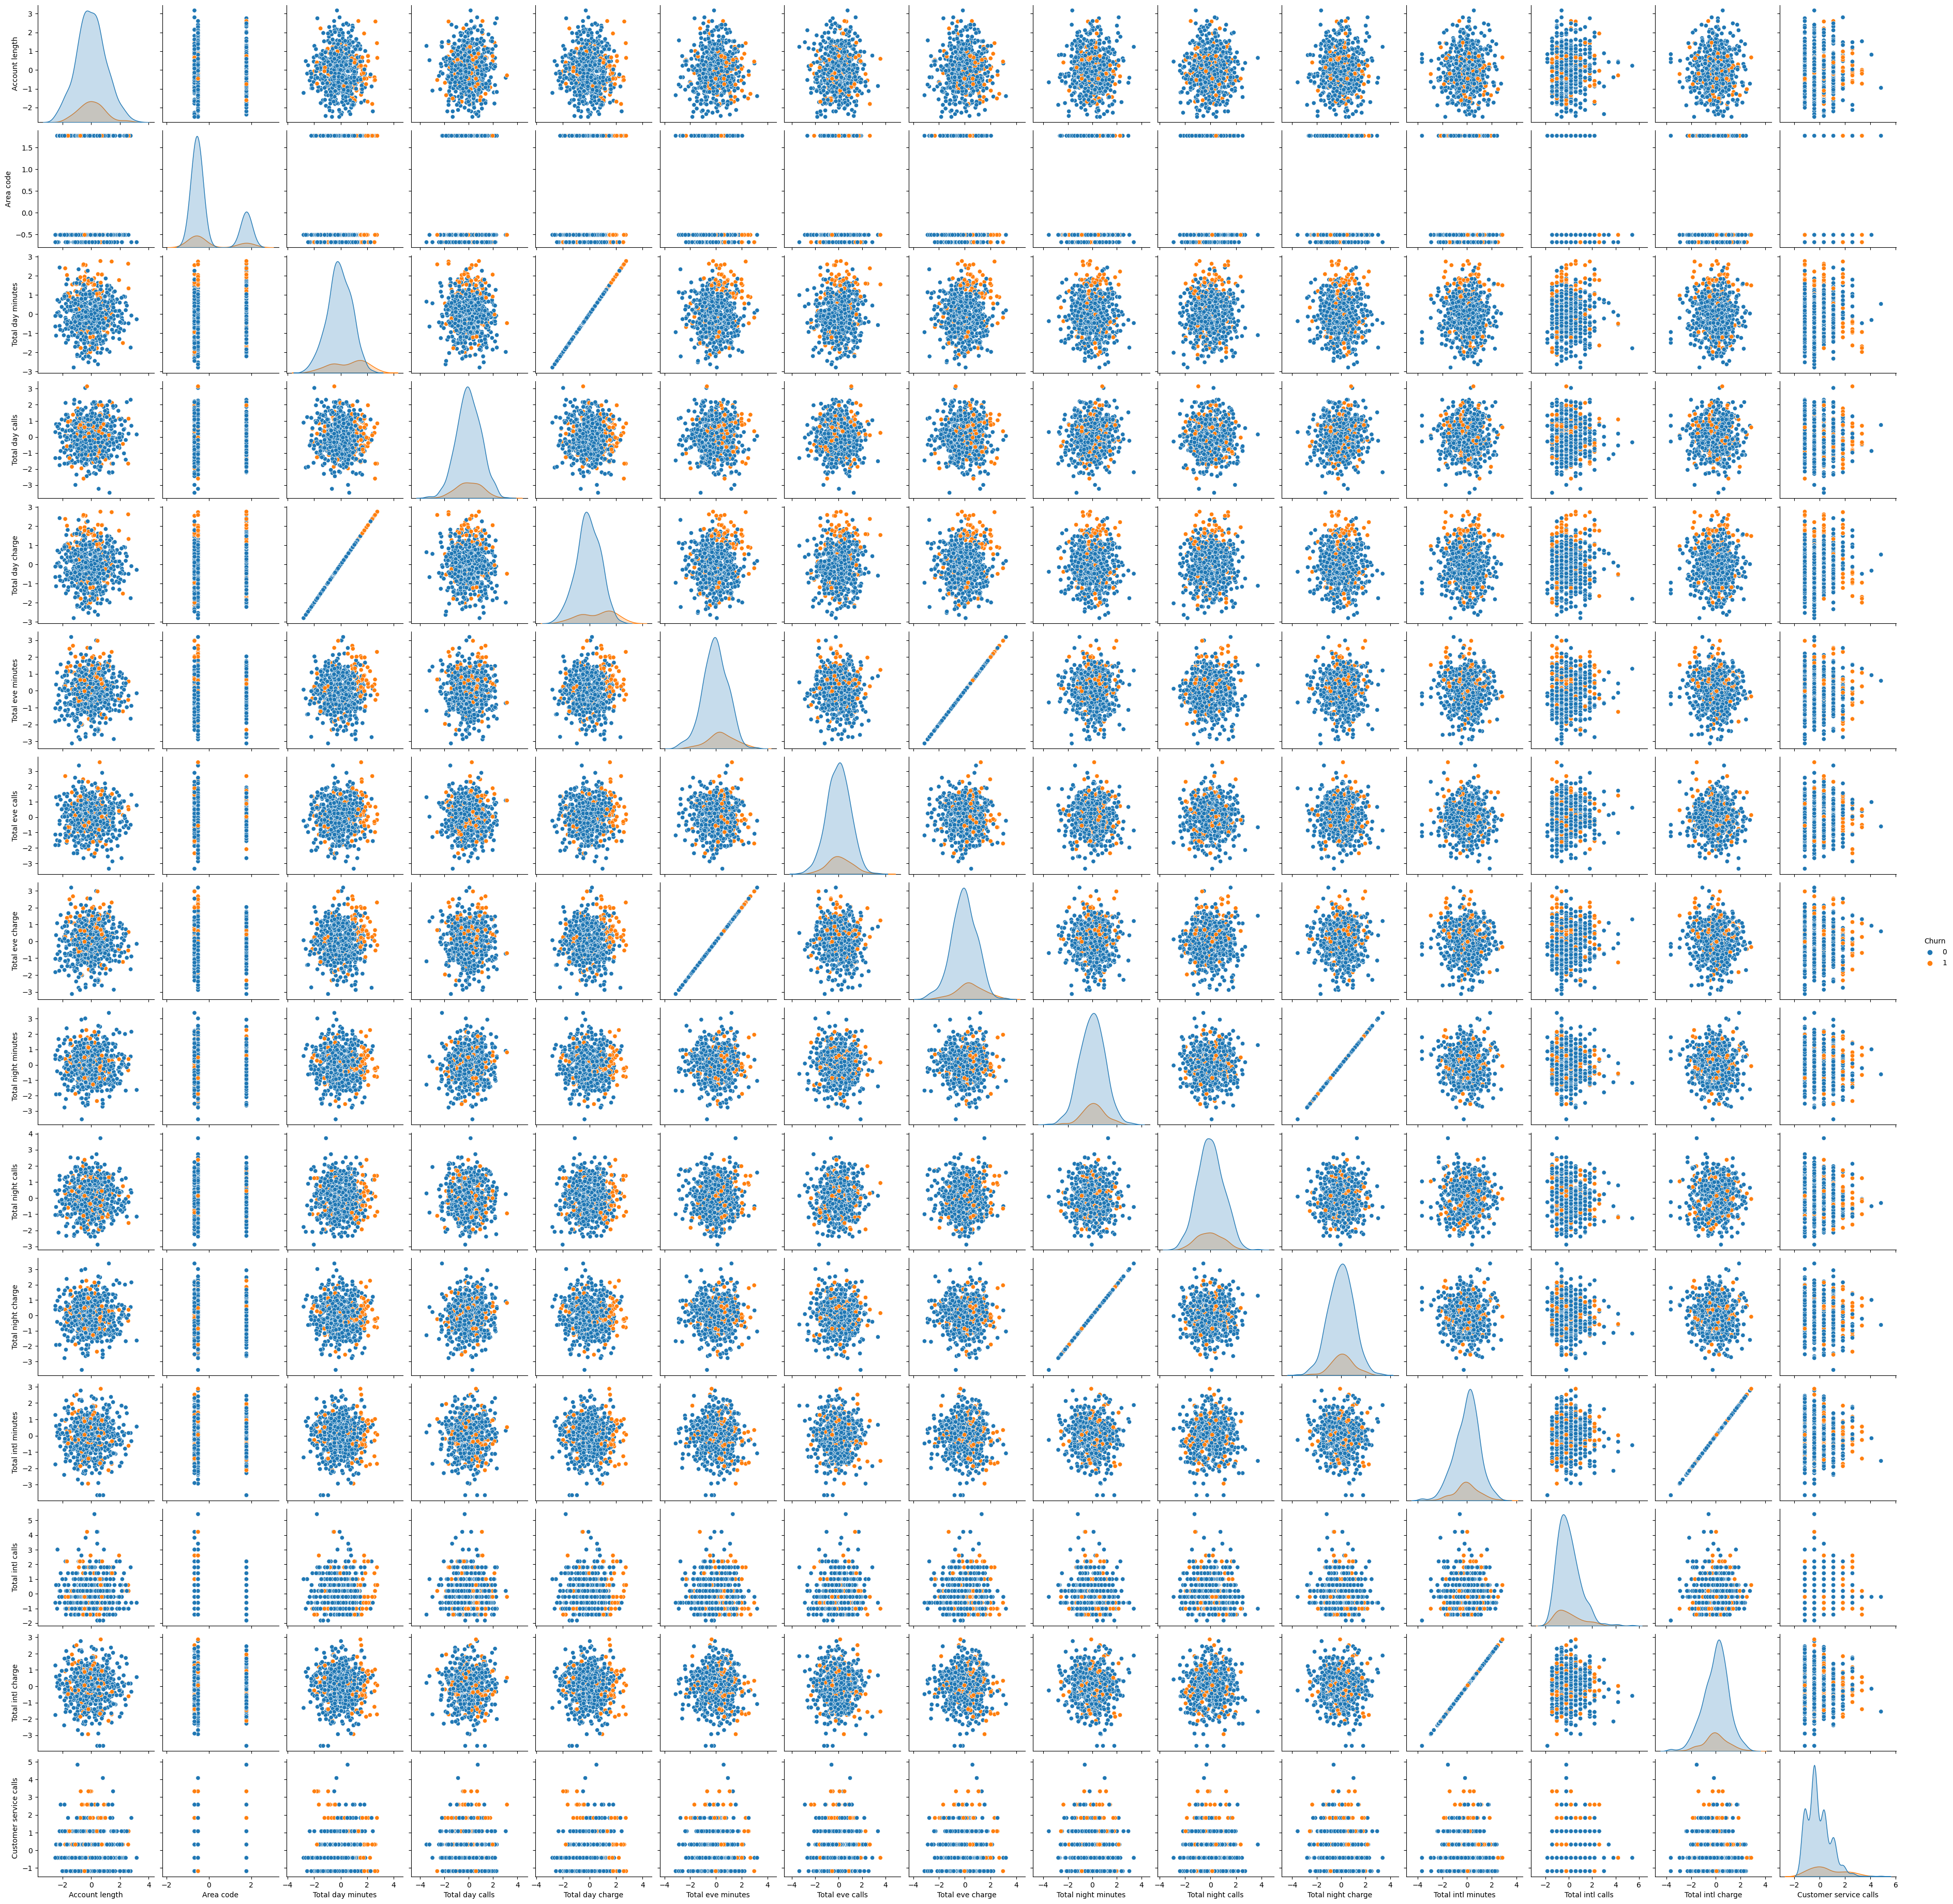

In [10]:
# Step 3: Data Visualization
# Visualization 1: Pairplot
sns.pairplot(df_scaled, hue='Churn')
plt.show()

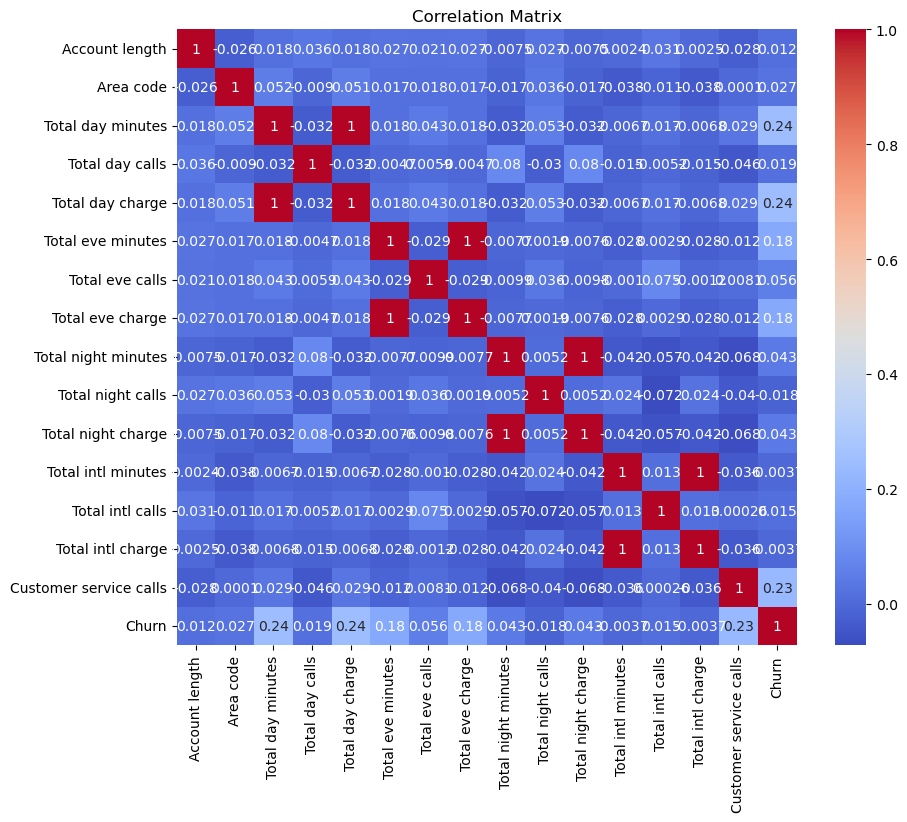

In [11]:
# Visualization 2: Correlation Matrix
correlation_matrix = df_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


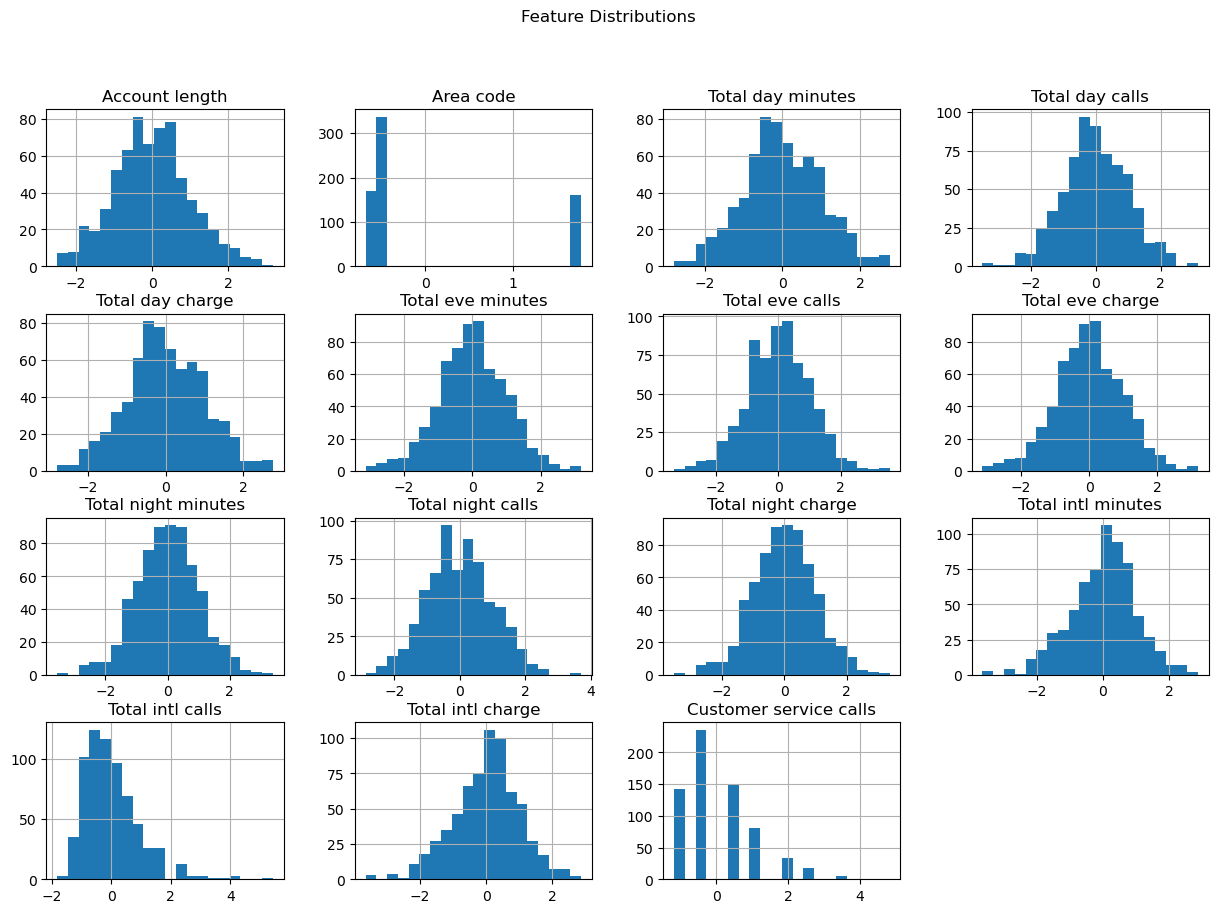

In [12]:
# Visualization 3: Distribution of Features
df_scaled.drop('Churn', axis=1).hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()


In [13]:
# Step 4: Prediction Set
# Split the data into features (X) and target variable (y)
X = df_scaled.drop('Churn', axis=1)
y = df_scaled['Churn']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:

# KNN Model
k_values = list(range(1, 21))
accuracy_scores = []
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

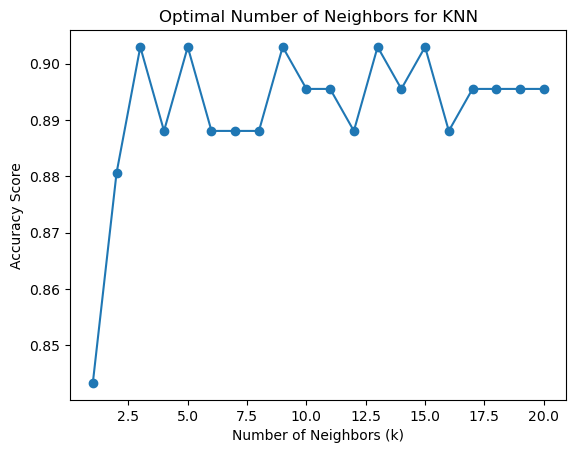

In [18]:
# Plot the optimal number of neighbors
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Optimal Number of Neighbors for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.show()


In [19]:
# Cross-validation
cv_scores = cross_val_score(knn_model, X, y, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", np.mean(cv_scores))


Cross-validation Scores: [0.85820896 0.85820896 0.86466165 0.85714286 0.85714286]
Mean Cross-validation Score: 0.8590730557737627


In [20]:
# Evaluation Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       119
           1       1.00      0.07      0.12        15

    accuracy                           0.90       134
   macro avg       0.95      0.53      0.53       134
weighted avg       0.91      0.90      0.85       134


Confusion Matrix:
[[119   0]
 [ 14   1]]


Thanks